In [576]:
import pandas as pd
import numpy as np
import seaborn as sns
import riskfolio as rp

#pd.options.display.float_format = '{:.4%}'.format

In [555]:
xl = pd.ExcelFile('wartosci_walorow.xlsx')
xl.sheet_names

['MSCI EM',
 'MSCI Japan',
 'MSCI PAcyfic ex Japan',
 'MSCI EUROPE',
 'SP500',
 'ACWI',
 'AGG BOND',
 'eurpln_m',
 '^tbsp_m(1)',
 'GLOBAL CORP',
 'AGG BOND Hedged',
 'mwig40tr',
 'mwig40_m',
 'swig80tr_m',
 'swig80_m',
 'wig20tr_m',
 'gold',
 'wig20']

In [556]:
# Sheets without benchmark - ACWI, and EURPLN
 
sheets = ['MSCI EM', 'MSCI Japan', 'MSCI PAcyfic ex Japan', 'eurpln_m', 'MSCI EUROPE', 'SP500', 'AGG BOND', '^tbsp_m(1)', 'GLOBAL CORP', 'AGG BOND Hedged', 'mwig40tr', 'mwig40_m', 'swig80tr_m', 'swig80_m', 'wig20tr_m', 'gold', 'wig20']


In [557]:
merged = xl.parse('ACWI')

for sheet in sheets:
    data = xl.parse(sheet)    
    merged = merged.merge(data, on='Date', how='left')

xl.close()


In [558]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      413 non-null    datetime64[ns]
 1   ACWI      413 non-null    float64       
 2   EM        413 non-null    float64       
 3   JPN       413 non-null    float64       
 4   Pacyfic   413 non-null    float64       
 5   EURPLN    247 non-null    float64       
 6   Europe    413 non-null    float64       
 7   SP500     363 non-null    float64       
 8   GAB       98 non-null     float64       
 9   TBSP      184 non-null    float64       
 10  GAC       116 non-null    float64       
 11  GABHDG    98 non-null     float64       
 12  Mwig40tr  148 non-null    float64       
 13  Mwig40    245 non-null    float64       
 14  Swig80tr  148 non-null    float64       
 15  Swig80    245 non-null    float64       
 16  Wig20tr   208 non-null    float64       
 17  Gold      413 no

In [559]:
merged.tail()

,Date,ACWI,EM,JPN,Pacyfic,EURPLN,Europe,SP500,GAB,TBSP,GAC,GABHDG,Mwig40tr,Mwig40,Swig80tr,Swig80,Wig20tr,Gold,Wig20
408,2021-12-01,18349584.8402%,33336195.4476%,19739456.1657%,77077184.8698%,466.0350%,81597672.0520%,23368294.3725%,1145552.7346%,187565.0000%,1522161.8656%,1164497.1604%,723986.0000%,532893.0000%,2694241.0000%,2018367.0000%,410817.0000%,9793519.6876%,219437.0000%
409,2022-01-01,17717755.1273%,33206099.1341%,19023820.4136%,73866329.0679%,458.9210%,79059783.8662%,22496728.7973%,1122079.2633%,183674.0000%,1497722.1748%,1145147.5097%,720578.0000%,529172.0000%,2683462.0000%,2005608.0000%,424399.0000%,9807008.1935%,226692.0000%
410,2022-02-01,17199169.0062%,32093850.1527%,18740206.0298%,75660705.4350%,458.0550%,76540573.2879%,21739335.1069%,1108739.6187%,182817.0000%,1461263.9113%,1129315.9773%,695368.0000%,510659.0000%,2607400.0000%,1948319.0000%,413672.0000%,10392980.7458%,220962.0000%
411,2022-03-01,17737052.8673%,31657136.8057%,18841436.4492%,81616025.2221%,470.2300%,77228505.3983%,22745558.2192%,230388.5709%,182250.0000%,1437464.3941%,538171.5837%,625635.0000%,458949.0000%,2442504.0000%,1824975.0000%,374406.0000%,10662051.4735%,199988.0000%
412,2022-04-01,17192836.1271%,31492456.4118%,18097181.2343%,80877705.7440%,464.7620%,76768339.2165%,21867188.5390%,217178.0197%,174617.0000%,1425533.9153%,507312.6602%,651343.0000%,477807.0000%,2638483.0000%,1971405.0000%,399338.0000%,11051172.4824%,213305.0000%


In [560]:
merged.columns

Index(['Date', 'ACWI', 'EM', 'JPN', 'Pacyfic', 'EURPLN', 'Europe', 'SP500',
       'GAB', 'TBSP', 'GAC', 'GABHDG', 'Mwig40tr', 'Mwig40', 'Swig80tr',
       'Swig80', 'Wig20tr', 'Gold', 'Wig20'],
      dtype='object')

In [561]:
assetes = ['ACWI', 'EM', 'JPN', 'Pacyfic', 'Europe', 'SP500', 'GAB',
       'TBSP', 'GAC', 'GABHDG', 'Mwig40tr', 'Mwig40', 'Swig80tr', 'Swig80',
       'Wig20tr', 'Gold', 'Wig20']

In [562]:
price_changes = merged[assetes].pct_change()
price_changes.set_index(merged['Date'], inplace=True)
price_changes.tail(10)

,ACWI,EM,JPN,Pacyfic,Europe,SP500,GAB,TBSP,GAC,GABHDG,Mwig40tr,Mwig40,Swig80tr,Swig80,Wig20tr,Gold,Wig20
Date,,,,,,,,,,,,,,,,,
2021-07-01,0.6587%,-6.7262%,-1.3229%,-1.5495%,1.8034%,2.3152%,1.3313%,0.2815%,1.2006%,1.1789%,-0.9467%,-1.6261%,0.7895%,-0.2335%,-0.5143%,3.4895%,-0.6694%
2021-08-01,3.0280%,3.1434%,3.5731%,1.1849%,2.0076%,3.5369%,-0.4161%,0.5804%,0.0028%,-0.2594%,2.7737%,2.4456%,0.9552%,0.3797%,2.3450%,-0.1182%,1.5795%
2021-09-01,-1.9759%,-1.8234%,5.1414%,-1.4780%,-2.6108%,-2.5511%,-1.7774%,-0.2592%,0.6433%,-1.0232%,5.9730%,5.9301%,1.9847%,1.8465%,5.0849%,-1.8552%,5.0846%
2021-10-01,4.5342%,0.4286%,-3.9101%,2.6451%,3.9499%,6.3997%,-0.2407%,-1.1029%,-0.5384%,-0.3231%,0.4249%,0.3743%,0.7329%,0.3145%,-1.3481%,0.9366%,-2.4383%
2021-11-01,0.0451%,-1.6861%,-0.0395%,-3.9734%,-2.7860%,1.7717%,-0.2936%,-3.1885%,1.6686%,0.6742%,8.7994%,8.5463%,0.9626%,0.9585%,4.1309%,4.5237%,4.1016%
2021-12-01,4.3719%,2.2576%,2.2464%,3.6525%,6.9565%,4.8230%,-0.1388%,-2.4567%,0.6349%,-0.5409%,-6.5598%,-6.5919%,-5.2064%,-5.2854%,-8.7600%,1.1996%,-8.7599%
2022-01-01,-3.4433%,-0.3903%,-3.6254%,-4.1658%,-3.1102%,-3.7297%,-2.0491%,-2.0745%,-1.6056%,-1.6616%,-0.4707%,-0.6983%,-0.4001%,-0.6321%,3.3061%,0.1377%,3.3062%
2022-02-01,-2.9269%,-3.3495%,-1.4908%,2.4292%,-3.1865%,-3.3667%,-1.1888%,-0.4666%,-2.4342%,-1.3825%,-3.4986%,-3.4985%,-2.8345%,-2.8564%,-2.5276%,5.9750%,-2.5277%
2022-03-01,3.1274%,-1.3607%,0.5402%,7.8711%,0.8988%,4.6286%,-79.2207%,-0.3101%,-1.6287%,-52.3453%,-10.0282%,-10.1261%,-6.3242%,-6.3308%,-9.4921%,2.5890%,-9.4921%


In [563]:
twenty = price_changes.loc['2002-01-01':'2022-04-01']
twenty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2002-01-01 to 2022-04-01
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ACWI      244 non-null    float64
 1   EM        244 non-null    float64
 2   JPN       244 non-null    float64
 3   Pacyfic   244 non-null    float64
 4   Europe    244 non-null    float64
 5   SP500     244 non-null    float64
 6   GAB       97 non-null     float64
 7   TBSP      183 non-null    float64
 8   GAC       115 non-null    float64
 9   GABHDG    97 non-null     float64
 10  Mwig40tr  147 non-null    float64
 11  Mwig40    244 non-null    float64
 12  Swig80tr  147 non-null    float64
 13  Swig80    244 non-null    float64
 14  Wig20tr   207 non-null    float64
 15  Gold      244 non-null    float64
 16  Wig20     244 non-null    float64
dtypes: float64(17)
memory usage: 34.3 KB


In [564]:
def annullised_mean(series):
    return np.mean(series)*12

def annullised_std(series):
    return np.std(series) * np.sqrt(12)


In [565]:
perf = twenty.agg(['mean', np.std])
perf.iloc[0,:] = perf.iloc[0,:]*12
perf.iloc[1,:] = perf.iloc[1,:] * np.sqrt(12)
#perf = twenty.agg([annullised_mean,annullised_std], axis=1)
perf


,ACWI,EM,JPN,Pacyfic,Europe,SP500,GAB,TBSP,GAC,GABHDG,Mwig40tr,Mwig40,Swig80tr,Swig80,Wig20tr,Gold,Wig20
mean,7.4954%,9.4875%,5.1233%,9.4565%,6.1636%,8.4700%,-9.1322%,3.7206%,3.9316%,-5.6407%,9.8412%,10.2206%,8.4919%,14.5711%,6.4457%,9.8935%,5.0145%
std,13.9263%,18.0287%,15.4251%,16.8099%,15.3063%,14.5170%,28.3182%,3.4656%,6.7741%,18.7622%,17.1555%,21.8469%,16.8336%,23.5954%,21.4914%,15.8280%,21.8878%


In [566]:
euro_assets = ['ACWI', 'EM', 'JPN', 'Pacyfic', 'Europe', 'SP500', 'Gold']
pln_assets = ['Mwig40tr', 'Mwig40', 'Swig80tr', 'Swig80', 'Wig20tr', 'Wig20', 'TBSP']
anused = ['GAB', 'GAC', 'GABHDG']

pln = merged[euro_assets].apply(lambda x: x * merged['EURPLN'])
pln_chng = pln.pct_change()
pln_chng.set_index(merged['Date'], inplace=True)
pln_chng = pd.merge(price_changes[pln_assets], pln_chng, left_index=True, right_index=True)
pln_chng.tail()


,Mwig40tr,Mwig40,Swig80tr,Swig80,Wig20tr,Wig20,TBSP,ACWI,EM,JPN,Pacyfic,Europe,SP500,Gold
Date,,,,,,,,,,,,,,
2021-12-01,-6.5598%,-6.5919%,-5.2064%,-5.2854%,-8.7600%,-8.7599%,-2.4567%,5.4409%,3.3050%,3.2936%,4.7142%,8.0520%,5.8966%,2.2362%
2022-01-01,-0.4707%,-0.6983%,-0.4001%,-0.6321%,3.3061%,3.3062%,-2.0745%,-4.9172%,-1.9108%,-5.0966%,-5.6287%,-4.5893%,-5.1993%,-1.3909%
2022-02-01,-3.4986%,-3.4985%,-2.8345%,-2.8564%,-2.5276%,-2.5277%,-0.4666%,-3.1101%,-3.5319%,-1.6767%,2.2359%,-3.3692%,-3.5490%,5.7751%
2022-03-01,-10.0282%,-10.1261%,-6.3242%,-6.3308%,-9.4921%,-9.4921%,-0.3101%,5.8685%,1.2611%,3.2125%,10.7383%,3.5806%,7.4096%,5.3158%
2022-04-01,4.1091%,4.1090%,8.0237%,8.0237%,6.6591%,6.6589%,-4.1882%,-4.1954%,-1.6770%,-5.0670%,-2.0569%,-1.7518%,-4.9796%,2.4443%


In [567]:
pln_chng.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 413 entries, 1987-12-01 to 2022-04-01
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mwig40tr  147 non-null    float64
 1   Mwig40    244 non-null    float64
 2   Swig80tr  147 non-null    float64
 3   Swig80    244 non-null    float64
 4   Wig20tr   207 non-null    float64
 5   Wig20     245 non-null    float64
 6   TBSP      183 non-null    float64
 7   ACWI      246 non-null    float64
 8   EM        246 non-null    float64
 9   JPN       246 non-null    float64
 10  Pacyfic   246 non-null    float64
 11  Europe    246 non-null    float64
 12  SP500     246 non-null    float64
 13  Gold      246 non-null    float64
dtypes: float64(14)
memory usage: 64.6 KB


In [568]:
pln_20 = pln_chng.loc['2002-01-01':'2022-04-01']

In [569]:
pln_20.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2002-01-01 to 2022-04-01
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mwig40tr  147 non-null    float64
 1   Mwig40    244 non-null    float64
 2   Swig80tr  147 non-null    float64
 3   Swig80    244 non-null    float64
 4   Wig20tr   207 non-null    float64
 5   Wig20     244 non-null    float64
 6   TBSP      183 non-null    float64
 7   ACWI      244 non-null    float64
 8   EM        244 non-null    float64
 9   JPN       244 non-null    float64
 10  Pacyfic   244 non-null    float64
 11  Europe    244 non-null    float64
 12  SP500     244 non-null    float64
 13  Gold      244 non-null    float64
dtypes: float64(14)
memory usage: 28.6 KB


In [570]:
perf_pln = pln_20.agg(['mean', np.std])
perf_pln

,Mwig40tr,Mwig40,Swig80tr,Swig80,Wig20tr,Wig20,TBSP,ACWI,EM,JPN,Pacyfic,Europe,SP500,Gold
mean,0.8201%,0.8517%,0.7077%,1.2143%,0.5371%,0.4179%,0.3101%,0.7463%,0.9133%,0.5435%,0.9128%,0.6338%,0.8291%,0.9544%
std,4.9524%,6.3067%,4.8594%,6.8114%,6.2040%,6.3185%,1.0004%,4.5567%,5.6450%,4.8276%,5.3675%,4.8954%,4.7391%,5.2272%


In [571]:

perf_pln.iloc[0,:] = perf_pln.iloc[0,:]*12
perf_pln.iloc[1,:] = perf_pln.iloc[1,:]*np.sqrt(12)
perf_pln

,Mwig40tr,Mwig40,Swig80tr,Swig80,Wig20tr,Wig20,TBSP,ACWI,EM,JPN,Pacyfic,Europe,SP500,Gold
mean,9.8412%,10.2206%,8.4919%,14.5711%,6.4457%,5.0145%,3.7206%,8.9558%,10.9599%,6.5218%,10.9538%,7.6057%,9.9488%,11.4528%
std,17.1555%,21.8469%,16.8336%,23.5954%,21.4914%,21.8878%,3.4656%,15.7848%,19.5550%,16.7232%,18.5934%,16.9582%,16.4166%,18.1075%


In [572]:
pln_10 = pln_chng.loc['2012-01-01':'2022-04-01']
print(annullised_mean(pln_10))
print(annullised_std(pln_10))


Mwig40tr   11.7383%
Mwig40      9.1278%
Swig80tr   11.7739%
Swig80      9.2574%
Wig20tr     4.2442%
Wig20       1.0141%
TBSP        2.9797%
ACWI       13.3579%
EM          7.6992%
JPN         9.8886%
Pacyfic    10.0182%
Europe     10.3552%
SP500      17.0040%
Gold        5.4224%
dtype: float64
Mwig40tr   17.0253%
Mwig40     17.0742%
Swig80tr   16.4616%
Swig80     16.5313%
Wig20tr    18.4931%
Wig20      18.4356%
TBSP        3.4747%
ACWI       14.0516%
EM         14.9346%
JPN        14.5956%
Pacyfic    17.0684%
Europe     15.1320%
SP500      15.0680%
Gold       15.8662%
dtype: float64


c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [573]:
corr10 = pln_10.corr(method='pearson')
corr10.style.format("{:.2%}").background_gradient(cmap='YlGn')

,Mwig40tr,Mwig40,Swig80tr,Swig80,Wig20tr,Wig20,TBSP,ACWI,EM,JPN,Pacyfic,Europe,SP500,Gold
Mwig40tr,100.00%,99.69%,83.59%,83.26%,79.07%,79.02%,-9.53%,-27.52%,-18.28%,-17.34%,-25.17%,-25.54%,-28.57%,-36.36%
Mwig40,99.69%,100.00%,84.23%,84.13%,79.06%,79.14%,-10.16%,-27.83%,-18.53%,-17.47%,-24.91%,-25.69%,-28.93%,-36.50%
Swig80tr,83.59%,84.23%,100.00%,99.81%,67.24%,67.67%,-7.35%,-20.23%,-13.85%,-15.31%,-18.02%,-18.30%,-20.85%,-30.39%
Swig80,83.26%,84.13%,99.81%,100.00%,66.36%,66.94%,-7.62%,-20.35%,-13.82%,-14.95%,-17.94%,-18.21%,-21.08%,-30.73%
Wig20tr,79.07%,79.06%,67.24%,66.36%,100.00%,99.57%,0.57%,-24.30%,-13.25%,-19.65%,-19.11%,-21.88%,-26.04%,-31.63%
Wig20,79.02%,79.14%,67.67%,66.94%,99.57%,100.00%,-1.14%,-24.47%,-13.26%,-19.50%,-19.39%,-22.03%,-26.22%,-31.21%
TBSP,-9.53%,-10.16%,-7.35%,-7.62%,0.57%,-1.14%,100.00%,-3.30%,0.21%,0.49%,-4.52%,-4.94%,-4.03%,-18.96%
ACWI,-27.52%,-27.83%,-20.23%,-20.35%,-24.30%,-24.47%,-3.30%,100.00%,80.01%,80.92%,85.83%,92.01%,97.00%,21.62%
EM,-18.28%,-18.53%,-13.85%,-13.82%,-13.25%,-13.26%,0.21%,80.01%,100.00%,64.76%,84.09%,72.78%,68.21%,27.53%
JPN,-17.34%,-17.47%,-15.31%,-14.95%,-19.65%,-19.50%,0.49%,80.92%,64.76%,100.00%,69.05%,74.01%,74.95%,8.05%


In [574]:
corr10 = pln_20.corr(method='pearson')
corr10.style.format("{:.2%}").background_gradient(cmap='YlGn')

,Mwig40tr,Mwig40,Swig80tr,Swig80,Wig20tr,Wig20,TBSP,ACWI,EM,JPN,Pacyfic,Europe,SP500,Gold
Mwig40tr,100.00%,99.72%,84.56%,84.29%,81.09%,81.17%,-5.47%,-30.04%,-20.99%,-20.99%,-27.96%,-28.30%,-30.56%,-29.06%
Mwig40,99.72%,100.00%,85.12%,86.19%,79.35%,80.14%,5.34%,-14.32%,-5.64%,-7.74%,-10.61%,-10.24%,-18.47%,-27.32%
Swig80tr,84.56%,85.12%,100.00%,99.84%,69.55%,70.36%,-3.85%,-21.66%,-15.06%,-19.00%,-19.59%,-19.90%,-22.10%,-26.55%
Swig80,84.29%,86.19%,99.84%,100.00%,69.16%,67.29%,5.10%,-8.24%,-0.10%,-2.93%,-4.25%,-4.28%,-13.01%,-22.64%
Wig20tr,81.09%,79.35%,69.55%,69.16%,100.00%,99.55%,14.59%,-20.55%,-13.97%,-17.49%,-17.95%,-16.01%,-23.45%,-27.67%
Wig20,81.17%,80.14%,70.36%,67.29%,99.55%,100.00%,13.47%,-19.70%,-12.60%,-10.23%,-17.81%,-15.46%,-23.16%,-23.67%
TBSP,-5.47%,5.34%,-3.85%,5.10%,14.59%,13.47%,100.00%,-2.64%,-0.58%,4.19%,-5.13%,-4.24%,-3.44%,-6.17%
ACWI,-30.04%,-14.32%,-21.66%,-8.24%,-20.55%,-19.70%,-2.64%,100.00%,85.11%,73.95%,87.97%,93.78%,96.48%,19.85%
EM,-20.99%,-5.64%,-15.06%,-0.10%,-13.97%,-12.60%,-0.58%,85.11%,100.00%,62.56%,89.55%,80.77%,72.66%,26.92%
JPN,-20.99%,-7.74%,-19.00%,-2.93%,-17.49%,-10.23%,4.19%,73.95%,62.56%,100.00%,63.36%,64.29%,68.15%,21.11%


In [577]:
# Building the portfolio object
port = rp.Portfolio(returns=pln_10)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,Mwig40tr,Mwig40,Swig80tr,Swig80,Wig20tr,Wig20,TBSP,ACWI,EM,JPN,Pacyfic,Europe,SP500,Gold
weights,12.6801%,0.0000%,3.0020%,0.0000%,0.0000%,0.0000%,59.2779%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,16.1158%,8.9242%


c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\riskfolio\PlotFunctions.py:569: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


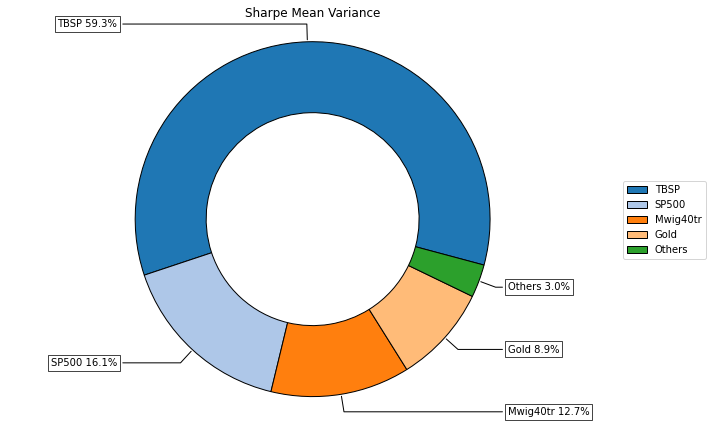

In [578]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [586]:
euro_assets = ['ACWI', 'EM', 'JPN', 'Pacyfic', 'Europe', 'SP500', 'Gold']
pln_assets = ['Mwig40tr', 'Mwig40', 'Swig80tr', 'Swig80', 'Wig20tr', 'Wig20', 'TBSP']
anused = ['GAB', 'GAC', 'GABHDG']
assets = ['EM', 'JPN', 'Pacyfic', 'Europe', 'SP500', 'Gold', 'Mwig40', 'Swig80', 'Wig20', 'TBSP']

# Building the portfolio object
port = rp.Portfolio(returns=pln_20[assets].loc['2008-01-01':'2022-04-01'])

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,EM,JPN,Pacyfic,Europe,SP500,Gold,Mwig40,Swig80,Wig20,TBSP
weights,0.0000%,0.0000%,0.0000%,0.0000%,13.6924%,8.2776%,5.0188%,0.3798%,0.0000%,72.6314%
